In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
DATA = Path("../../data")

In [4]:
train_data = pd.read_csv(DATA / "train_outlier_preprocessing.csv")
test_data = pd.read_csv(DATA / "test_outlier_preprocessing.csv")

In [5]:
train_data

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,NaN,NaN,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,NaN,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,NaN,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,NaN,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,NaN,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,NaN,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,NaN,NaN,n,t,NaN,NaN,p,9.13,17.77,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [6]:
train_data["cap-diameter_log1p"] = np.log1p(train_data["cap-diameter"])
train_data["stem-width_log1p"] = np.log1p(train_data["stem-width"])
train_data["stem-height_log1p"] = np.log1p(train_data["stem-height"])

<Axes: xlabel='class', ylabel='stem-height'>

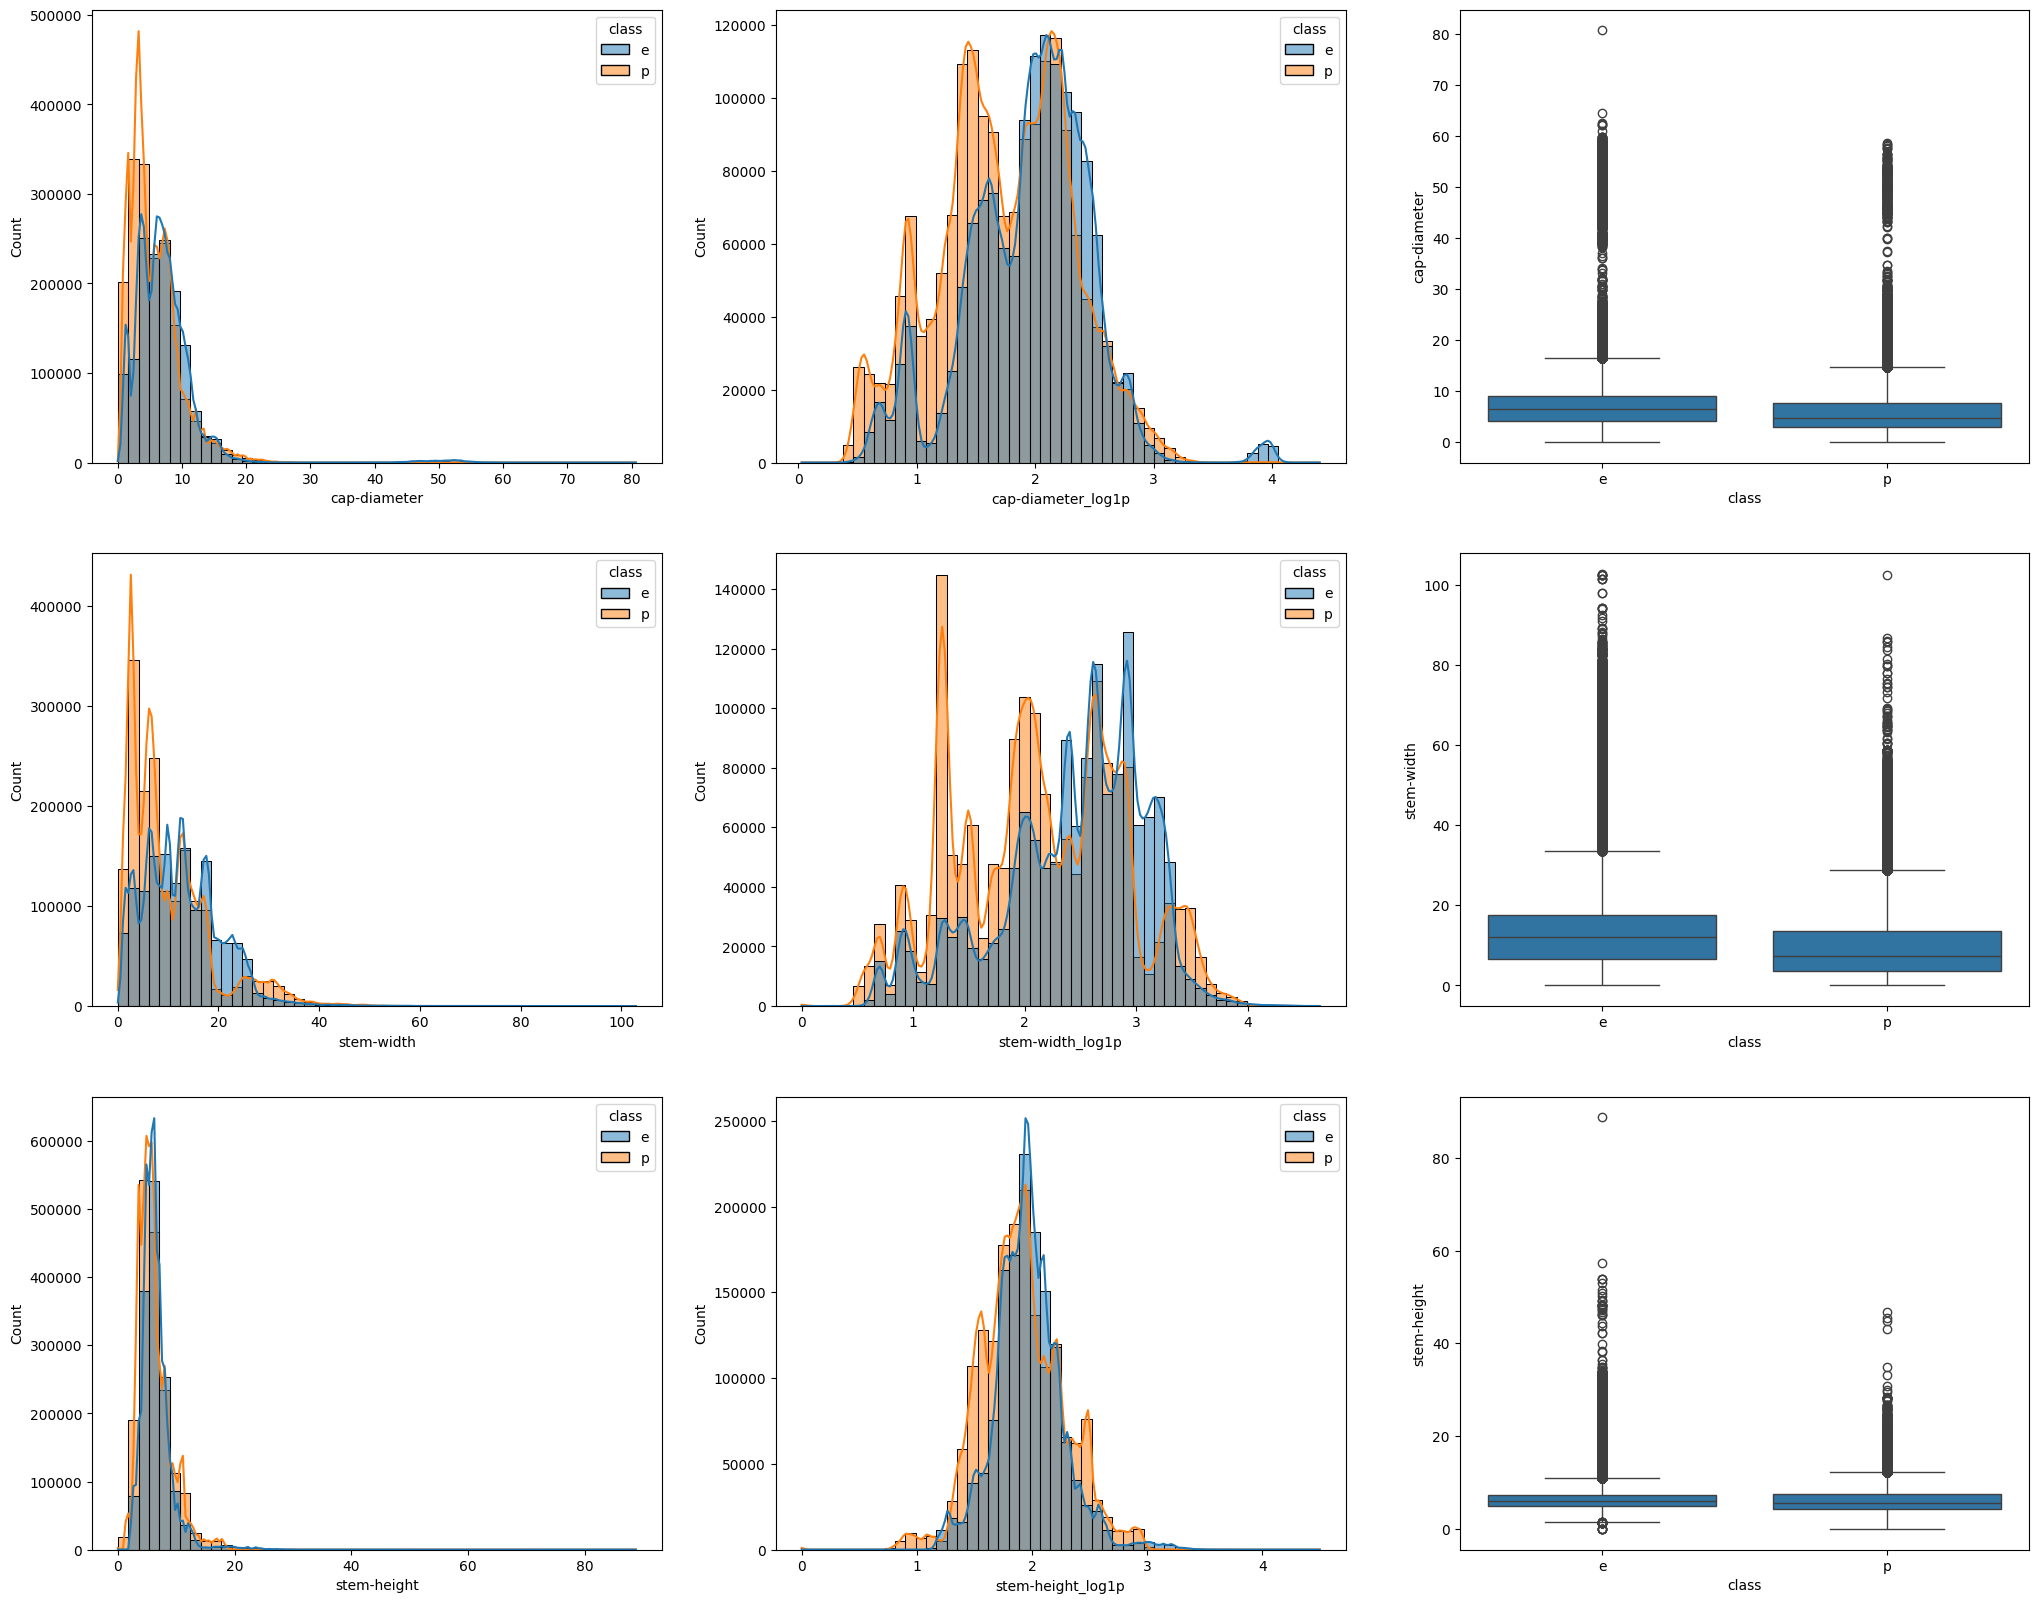

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

sns.histplot(train_data, x="cap-diameter", hue="class", bins=50, kde=True, ax=axes[0][0])
sns.histplot(train_data, x="cap-diameter_log1p", hue="class", bins=50, kde=True, ax=axes[0][1])
sns.boxplot(train_data, x="class", y="cap-diameter", ax=axes[0][2])


sns.histplot(train_data, x="stem-width", hue="class", bins=50, kde=True, ax=axes[1][0])
sns.histplot(train_data, x="stem-width_log1p", hue="class", bins=50, kde=True, ax=axes[1][1])
sns.boxplot(train_data, x="class", y="stem-width", ax=axes[1][2])

sns.histplot(train_data, x="stem-height", hue="class", bins=50, kde=True, ax=axes[2][0])
sns.histplot(train_data, x="stem-height_log1p", hue="class", bins=50, kde=True, ax=axes[2][1])
sns.boxplot(train_data, x="class", y="stem-height", ax=axes[2][2])

In [8]:
# IQR 방법으로 아웃라이어 처리

def outlier_remove_iqr(data, column,threshold=1.5):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    
    lower = q1 - (threshold * iqr)
    upper = q3 + (threshold * iqr)

    data.loc[(data[column] > upper) | (data[column] < lower), column] = np.nan
    return data[column]

In [9]:
train_data["cap-diameter_after"] = outlier_remove_iqr(data=train_data, column="cap-diameter")
train_data["stem-width_after"] = outlier_remove_iqr(data=train_data, column="stem-width")
train_data["stem-height_after"] = outlier_remove_iqr(data=train_data, column="stem-height")

In [10]:
train_data["cap-diameter_after_log1p"] = np.log1p(train_data["cap-diameter_after"])
train_data["stem-width_after_log1p"] = np.log1p(train_data["stem-width_after"])
train_data["stem-height_after_log1p"] = np.log1p(train_data["stem-height_after"])

<Axes: xlabel='class', ylabel='stem-height_after'>

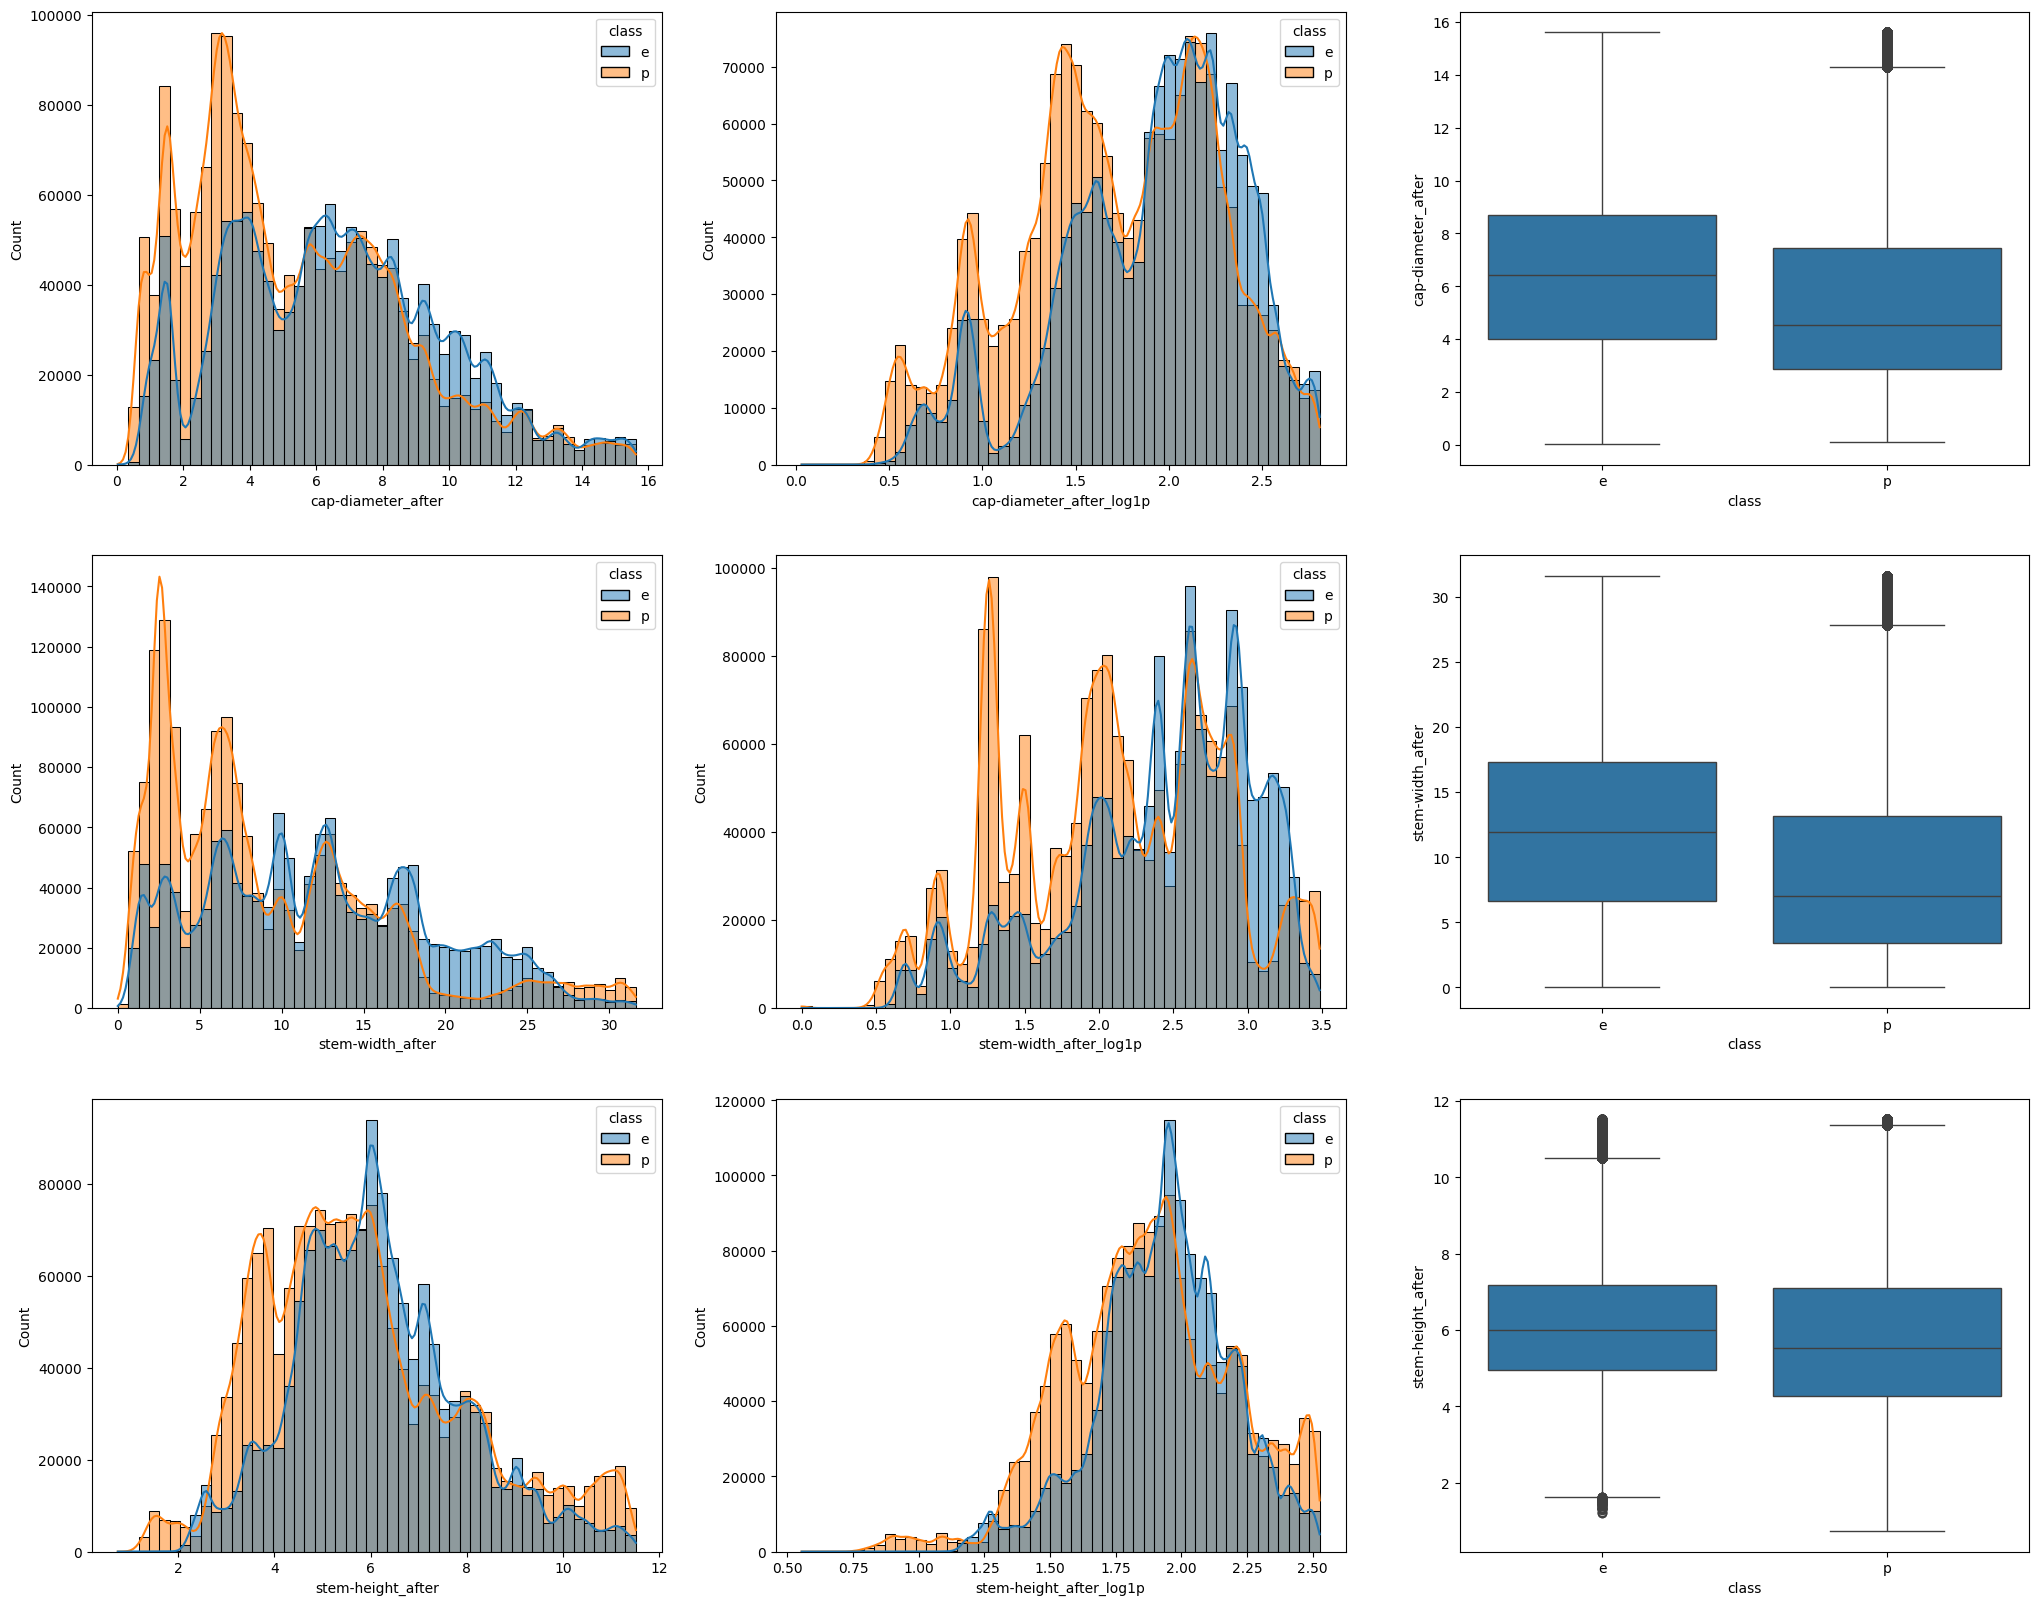

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

sns.histplot(train_data, x="cap-diameter_after", hue="class", bins=50, kde=True, ax=axes[0][0])
sns.histplot(train_data, x="cap-diameter_after_log1p", hue="class", bins=50, kde=True, ax=axes[0][1])
sns.boxplot(train_data, x="class", y="cap-diameter_after", ax=axes[0][2])


sns.histplot(train_data, x="stem-width_after", hue="class", bins=50, kde=True, ax=axes[1][0])
sns.histplot(train_data, x="stem-width_after_log1p", hue="class", bins=50, kde=True, ax=axes[1][1])
sns.boxplot(train_data, x="class", y="stem-width_after", ax=axes[1][2])

sns.histplot(train_data, x="stem-height_after", hue="class", bins=50, kde=True, ax=axes[2][0])
sns.histplot(train_data, x="stem-height_after_log1p", hue="class", bins=50, kde=True, ax=axes[2][1])
sns.boxplot(train_data, x="class", y="stem-height_after", ax=axes[2][2])

In [12]:
train_data2 = train_data.copy()

In [13]:
del train_data2["veil-color"]
del train_data2["stem-root"]
del train_data2["spore-print-color"]
del train_data2["veil-type"]

In [14]:
train_data2

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season,cap-diameter_log1p,stem-width_log1p,stem-height_log1p,cap-diameter_after,stem-width_after,stem-height_after,cap-diameter_after_log1p,stem-width_after_log1p,stem-height_after_log1p
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a,2.282382,2.796671,1.706565,8.80,15.39,4.51,2.282382,2.796671,1.706565
1,1,p,4.51,x,NaN,NaN,f,a,c,n,4.79,6.48,y,o,t,z,d,w,1.706565,2.012233,1.756132,4.51,6.48,4.79,1.706565,2.012233,1.756132
2,2,e,6.94,f,s,b,f,NaN,c,w,6.85,9.93,s,n,f,f,l,w,2.071913,2.391511,2.060514,6.94,9.93,6.85,2.071913,2.391511,2.060514
3,3,e,3.88,f,y,g,f,NaN,NaN,g,4.16,6.53,NaN,w,f,f,d,u,1.585145,2.018895,1.640937,3.88,6.53,4.16,1.585145,2.018895,1.640937
4,4,e,5.85,x,NaN,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a,1.924249,2.236445,1.474763,5.85,8.36,3.37,1.924249,2.236445,1.474763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,NaN,18.81,NaN,w,t,NaN,d,u,2.331173,2.986187,2.575661,9.29,18.81,NaN,2.331173,2.986187,NaN
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,w,f,f,d,u,2.474856,3.331133,2.034706,10.88,26.97,6.65,2.474856,3.331133,2.034706
3116942,3116942,p,7.82,x,NaN,e,f,a,NaN,w,9.51,11.06,NaN,y,t,z,d,a,2.177022,2.489894,2.352327,7.82,11.06,9.51,2.177022,2.489894,2.352327
3116943,3116943,e,9.45,NaN,NaN,n,t,NaN,NaN,p,9.13,17.77,y,w,t,p,d,u,2.346602,2.932260,2.315501,9.45,17.77,9.13,2.346602,2.932260,2.315501


In [25]:
train_data2.dropna(inplace=True)

<Axes: xlabel='class', ylabel='stem-height_after'>

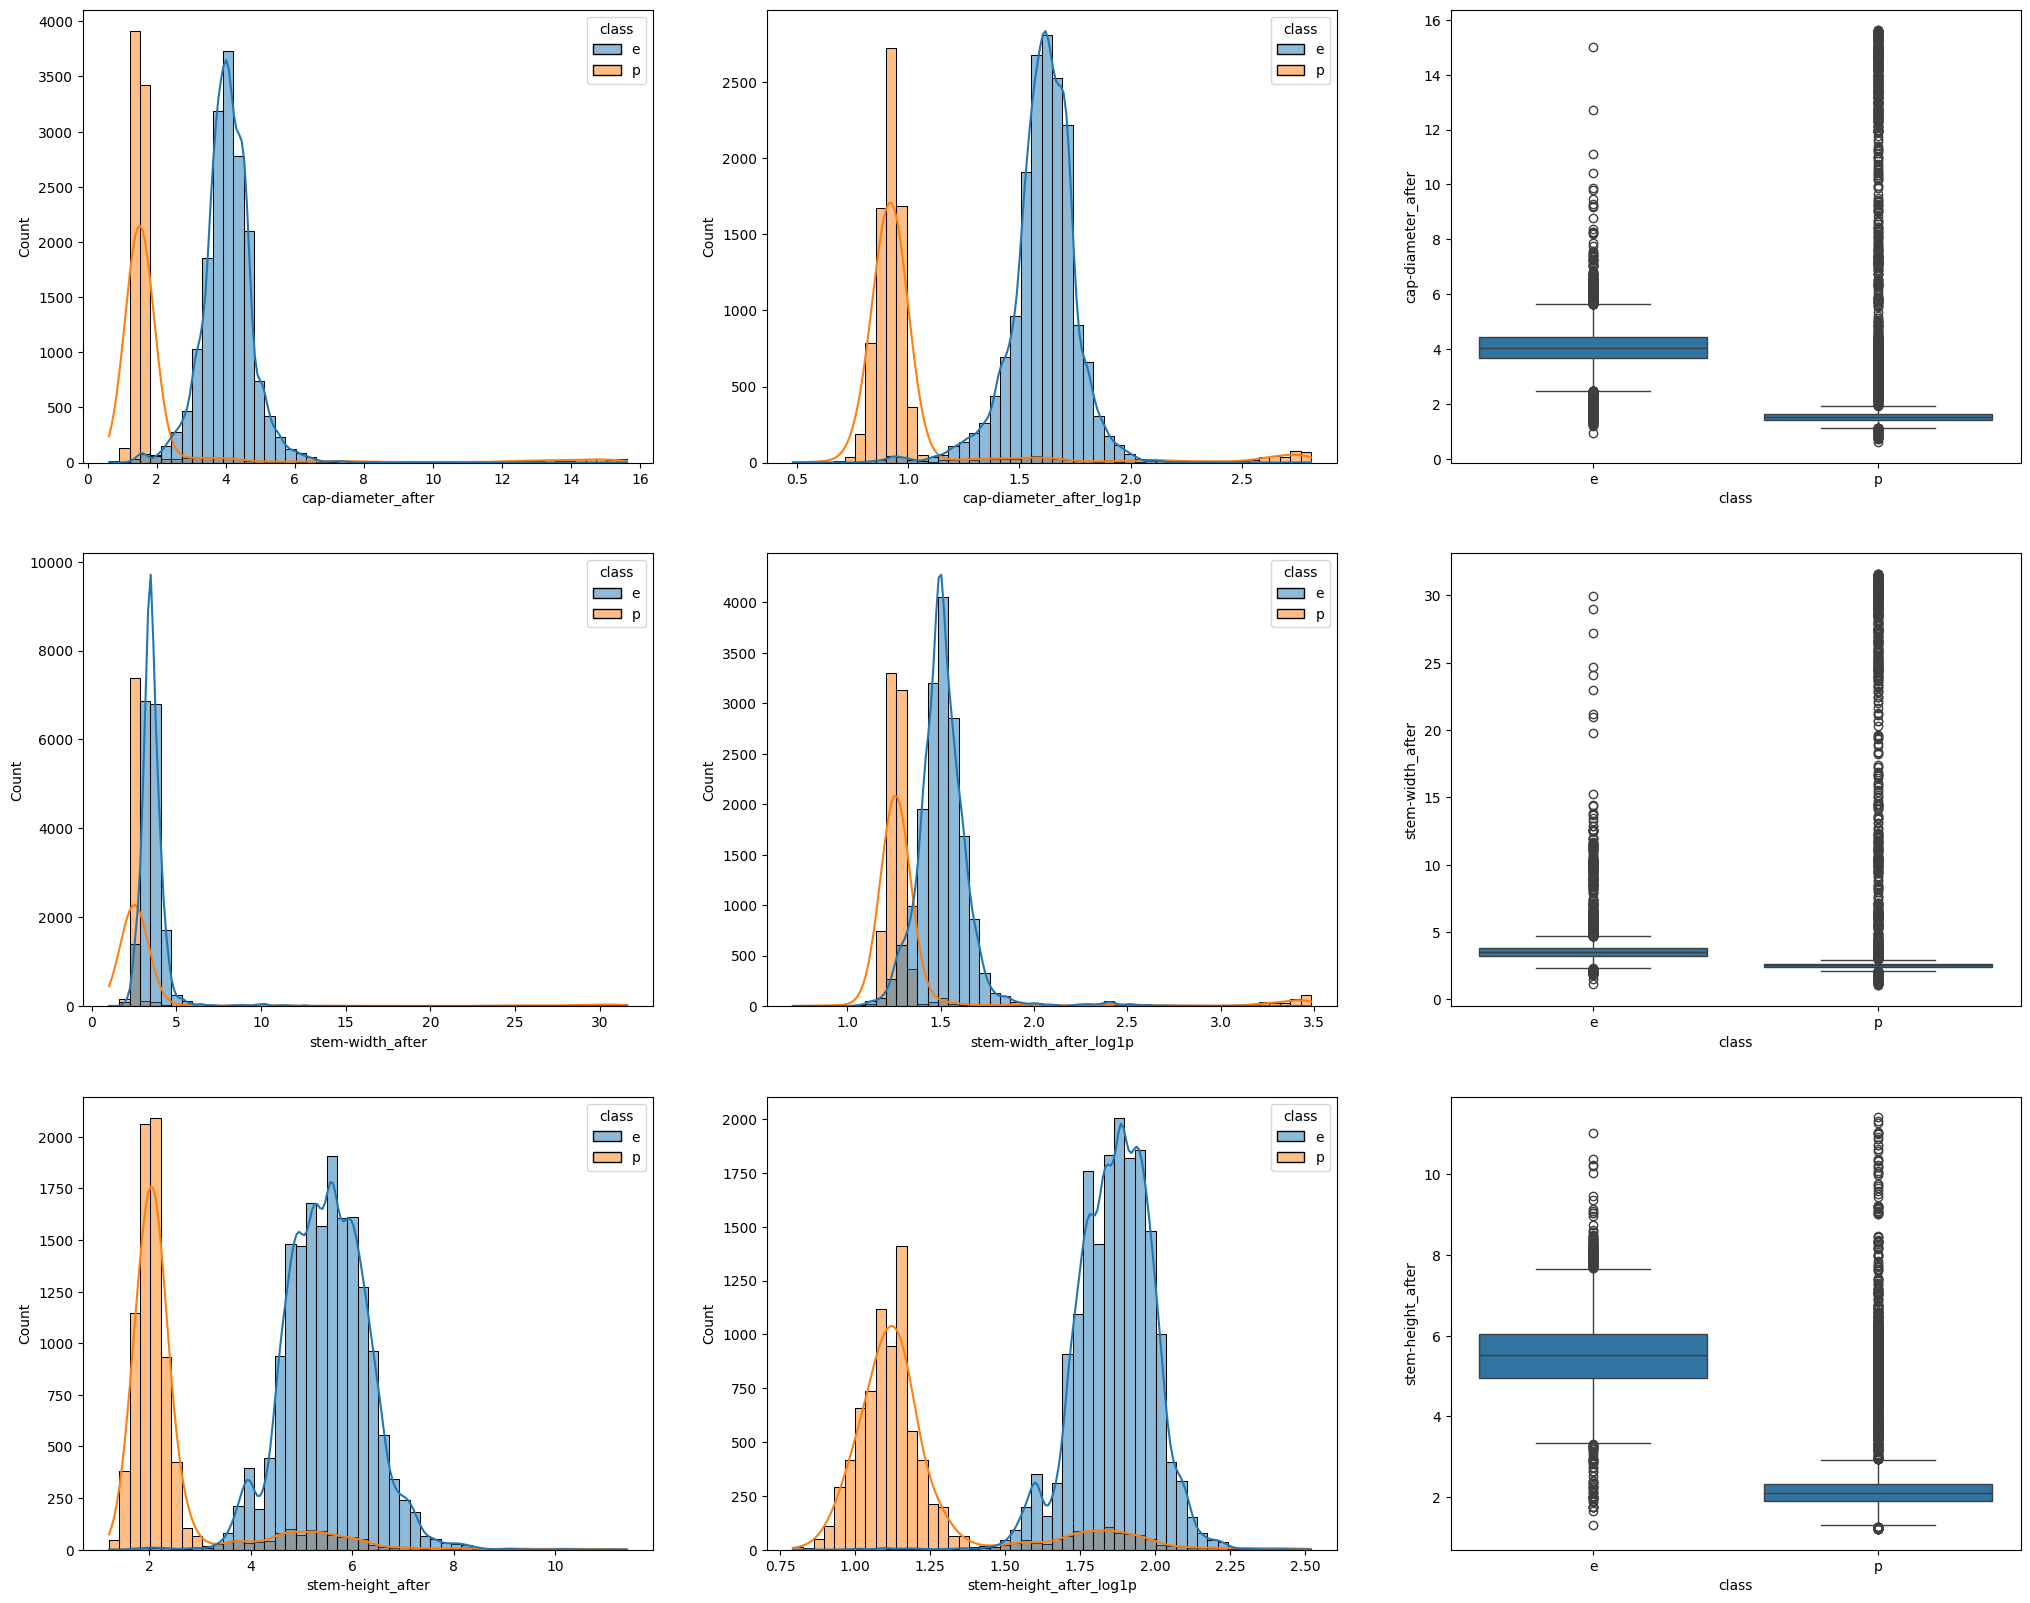

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

sns.histplot(train_data2, x="cap-diameter_after", hue="class", bins=50, kde=True, ax=axes[0][0])
sns.histplot(train_data2, x="cap-diameter_after_log1p", hue="class", bins=50, kde=True, ax=axes[0][1])
sns.boxplot(train_data2, x="class", y="cap-diameter_after", ax=axes[0][2])


sns.histplot(train_data2, x="stem-width_after", hue="class", bins=50, kde=True, ax=axes[1][0])
sns.histplot(train_data2, x="stem-width_after_log1p", hue="class", bins=50, kde=True, ax=axes[1][1])
sns.boxplot(train_data2, x="class", y="stem-width_after", ax=axes[1][2])

sns.histplot(train_data2, x="stem-height_after", hue="class", bins=50, kde=True, ax=axes[2][0])
sns.histplot(train_data2, x="stem-height_after_log1p", hue="class", bins=50, kde=True, ax=axes[2][1])
sns.boxplot(train_data2, x="class", y="stem-height_after", ax=axes[2][2])

In [29]:
train_data2["cap-diameter_after"] = outlier_remove_iqr(data=train_data2, column="cap-diameter")
train_data2["stem-width_after"] = outlier_remove_iqr(data=train_data2, column="stem-width")
train_data2["stem-height_after"] = outlier_remove_iqr(data=train_data2, column="stem-height")

In [31]:
train_data2["cap-diameter_after_log1p"] = np.log1p(train_data2["cap-diameter_after"])
train_data2["stem-width_after_log1p"] = np.log1p(train_data2["stem-width_after"])
train_data2["stem-height_after_log1p"] = np.log1p(train_data2["stem-height_after"])

<Axes: xlabel='class', ylabel='stem-height_after'>

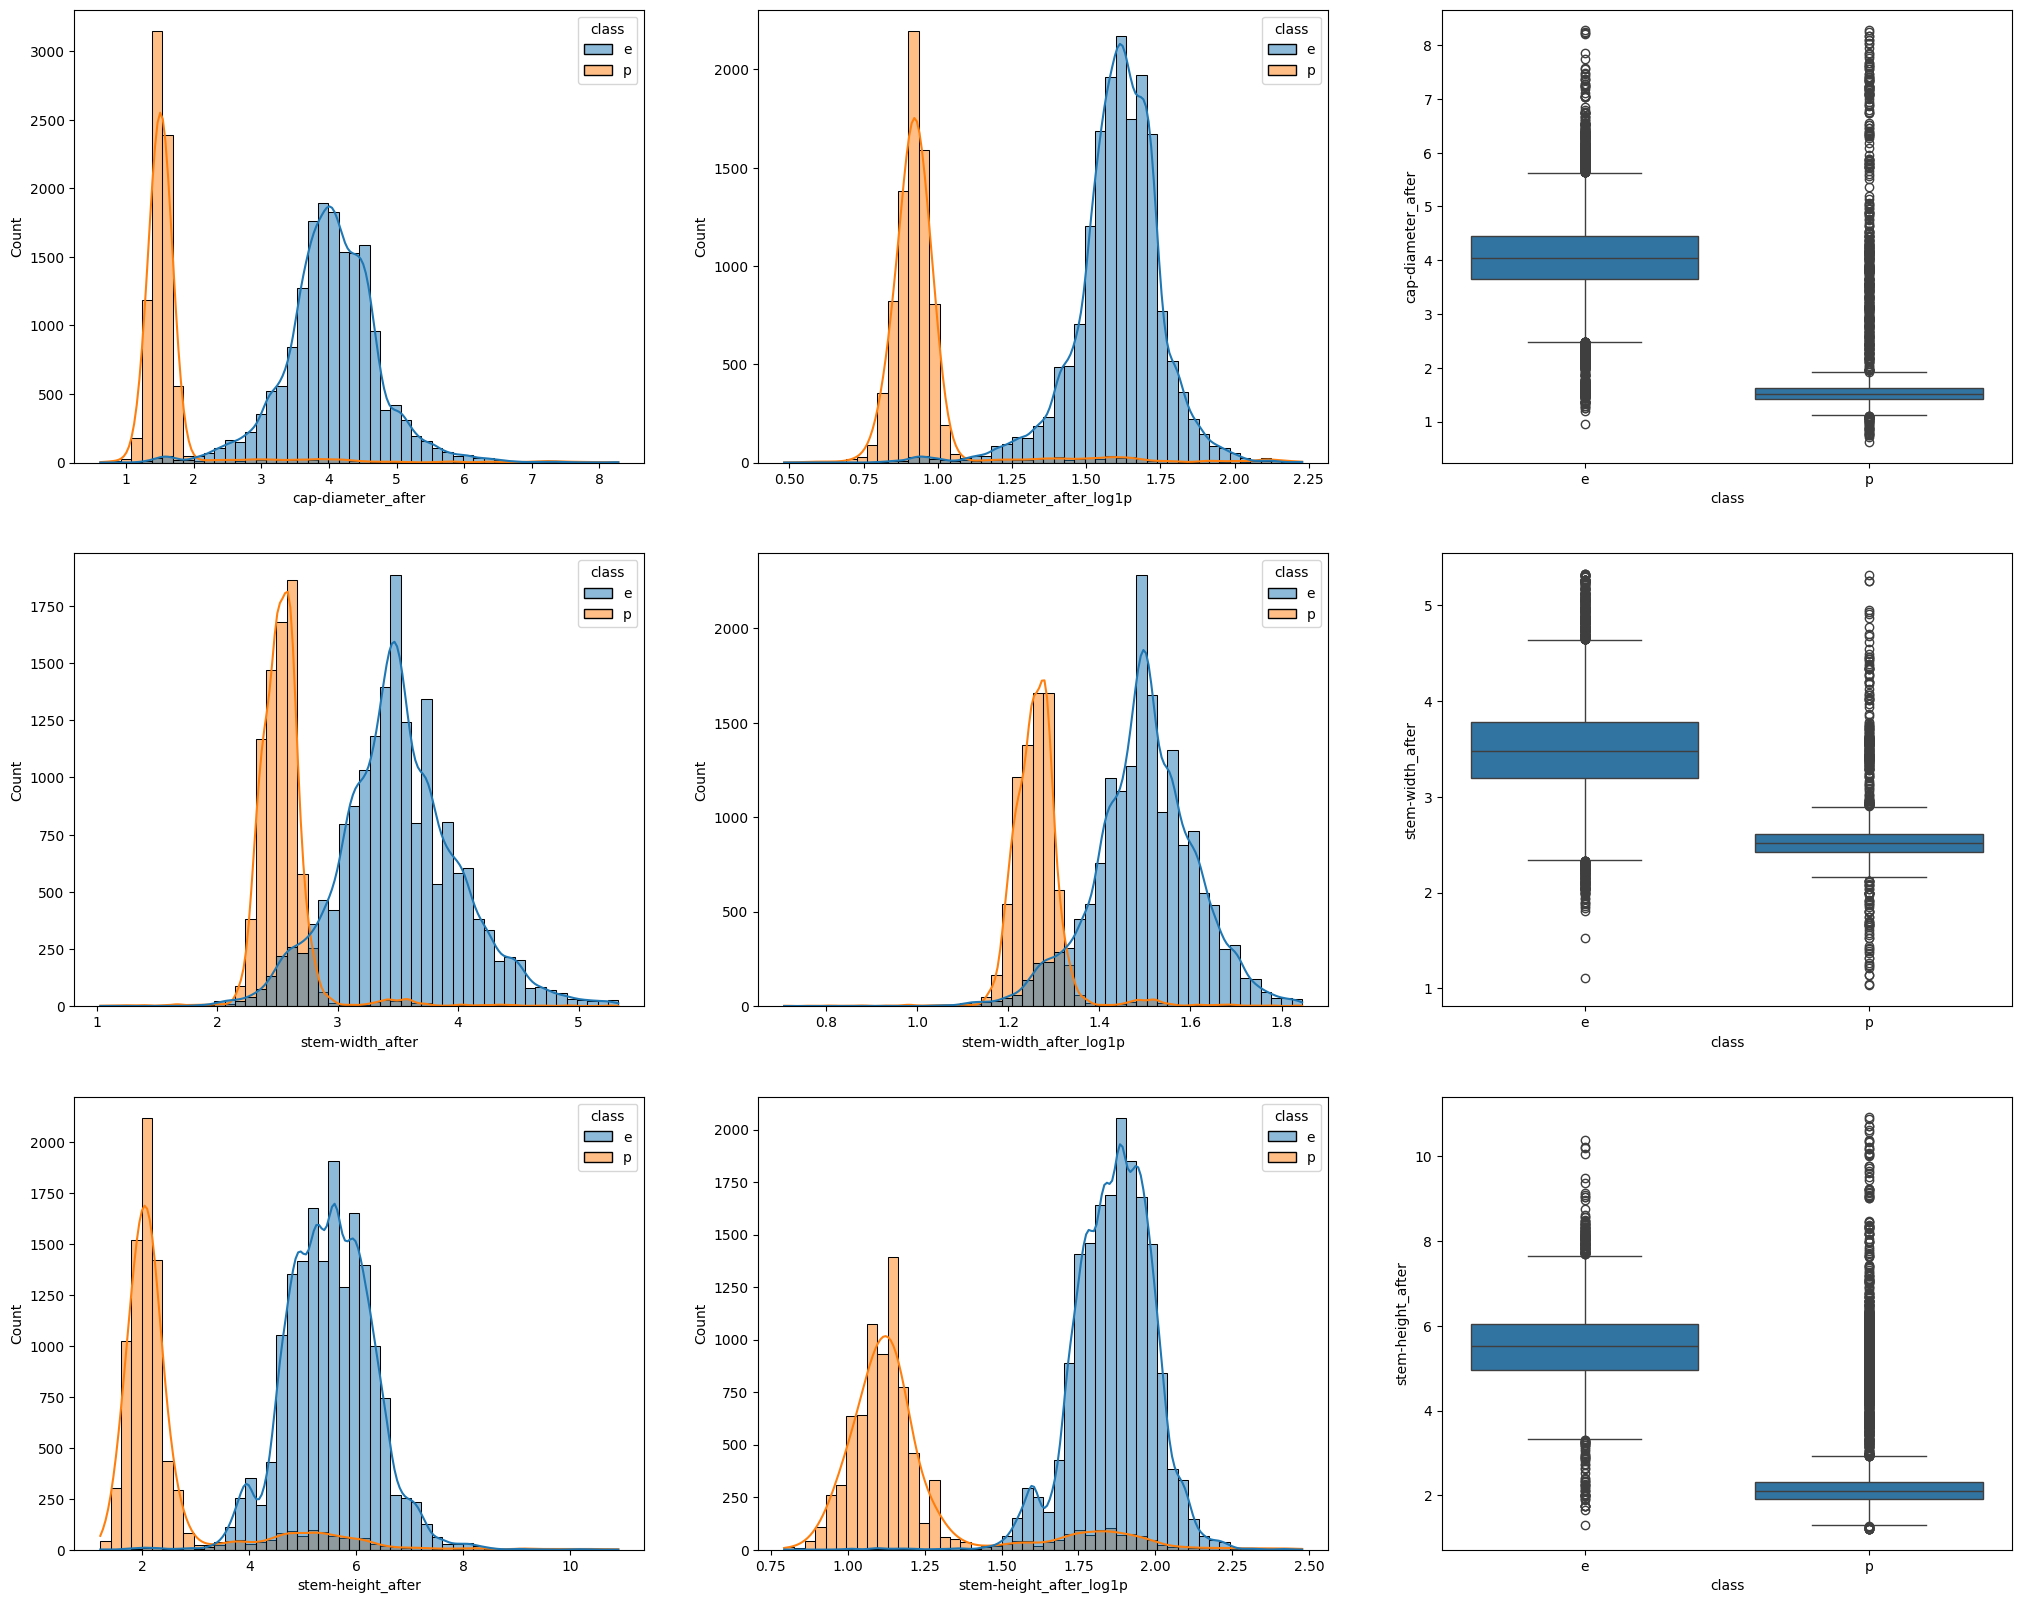

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

sns.histplot(train_data2, x="cap-diameter_after", hue="class", bins=50, kde=True, ax=axes[0][0])
sns.histplot(train_data2, x="cap-diameter_after_log1p", hue="class", bins=50, kde=True, ax=axes[0][1])
sns.boxplot(train_data2, x="class", y="cap-diameter_after", ax=axes[0][2])


sns.histplot(train_data2, x="stem-width_after", hue="class", bins=50, kde=True, ax=axes[1][0])
sns.histplot(train_data2, x="stem-width_after_log1p", hue="class", bins=50, kde=True, ax=axes[1][1])
sns.boxplot(train_data2, x="class", y="stem-width_after", ax=axes[1][2])

sns.histplot(train_data2, x="stem-height_after", hue="class", bins=50, kde=True, ax=axes[2][0])
sns.histplot(train_data2, x="stem-height_after_log1p", hue="class", bins=50, kde=True, ax=axes[2][1])
sns.boxplot(train_data2, x="class", y="stem-height_after", ax=axes[2][2])

In [33]:
def display_number(ax, dtype='float'):
    if dtype == 'float':
        for p in ax.patches:
            ax.text(p.get_x() + (p.get_width()/2),
                    p.get_y() + (p.get_height()*1.015),
                    f"{p.get_height():.2f}",
                    ha = 'center')
    elif dtype == 'int':
        for p in ax.patches:
            ax.text(p.get_x() + (p.get_width()/2),
                    p.get_y() + (p.get_height()*1.015),
                    f"{int(p.get_height())}",
                    ha = 'center')

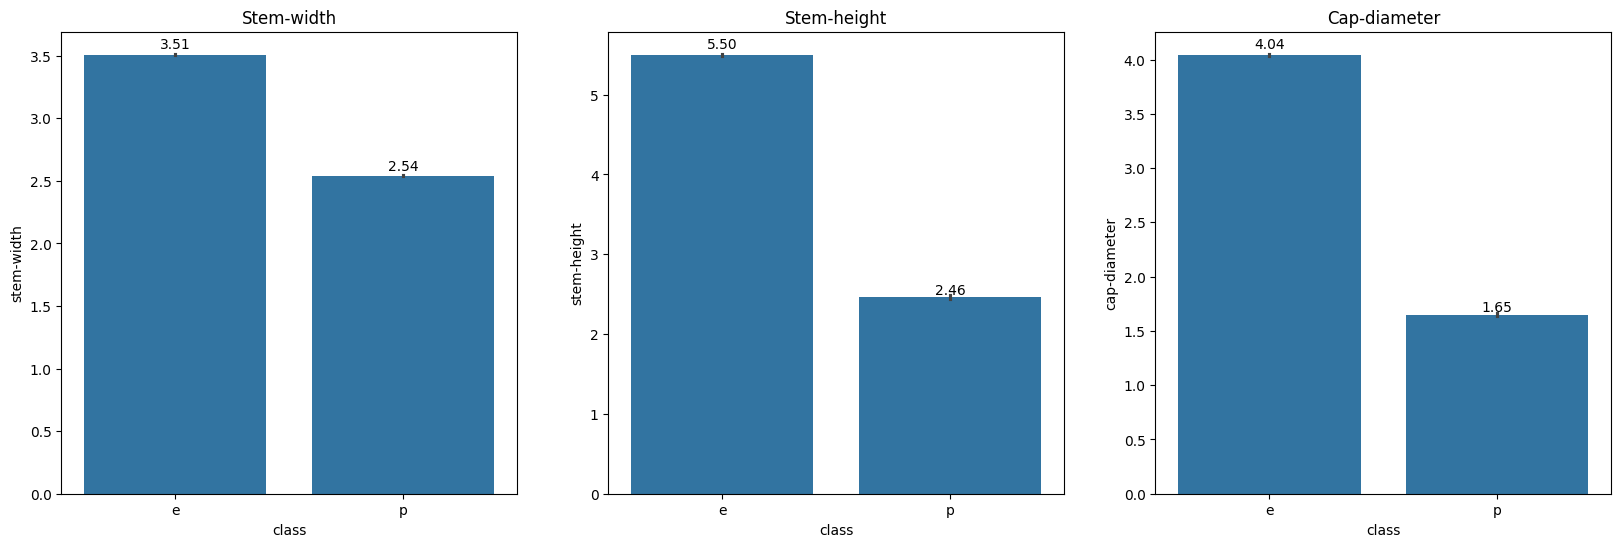

In [34]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=train_data2, x='class', y='stem-width')
display_number(ax1)
ax1.set_title("Stem-width")

plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=train_data2, x='class', y='stem-height')
ax2.set_title("Stem-height")
display_number(ax2)

plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=train_data2, x='class', y='cap-diameter')
ax3.set_title("Cap-diameter")
display_number(ax3)

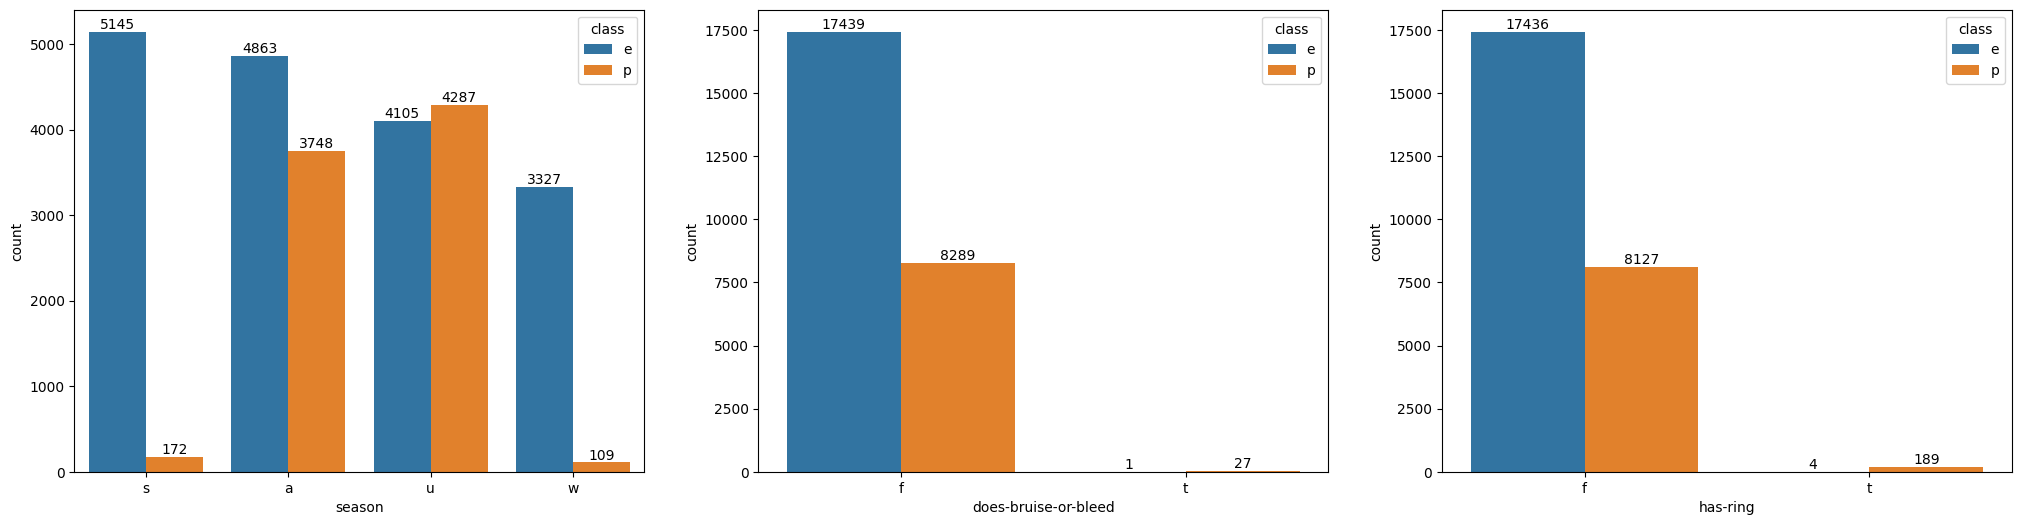

In [35]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
ax4 = sns.countplot(data=train_data2, x="season", hue="class")
for p in ax4.containers:
    ax4.bar_label(p)

plt.subplot(1, 3, 2)
ax5 = sns.countplot(data=train_data2, x="does-bruise-or-bleed", hue='class')
for p in ax5.containers:
    ax5.bar_label(p, fmt='%d')

plt.subplot(1, 3, 3)
ax6 = sns.countplot(data=train_data2, x="has-ring", hue='class')
for p in ax6.containers:
    ax6.bar_label(p, fmt='%d')

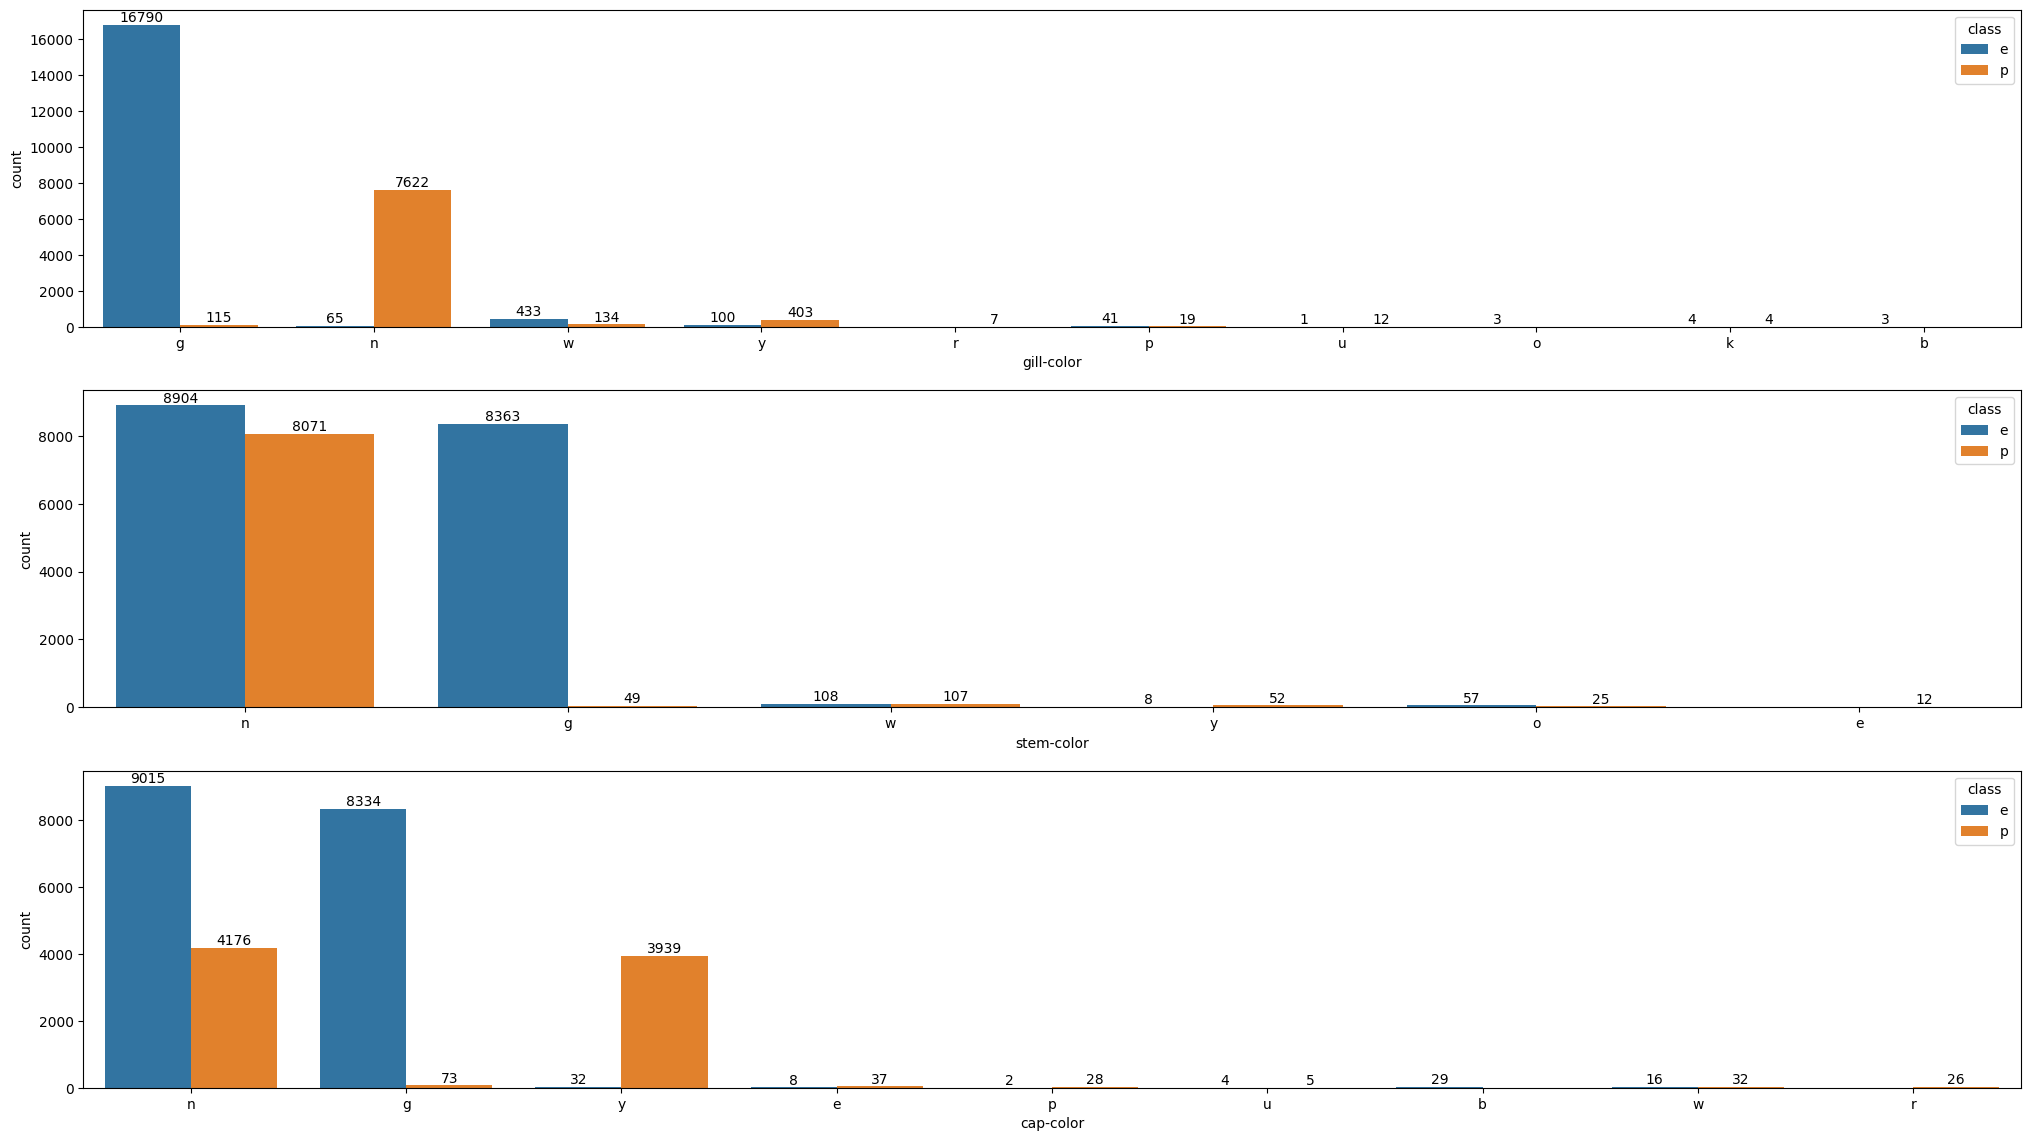

In [36]:
plt.figure(figsize=(25, 14))

plt.subplot(3, 1, 1)
ax7 = sns.countplot(data=train_data2, x='gill-color', hue='class')
for p in ax7.containers:
    ax7.bar_label(p)

plt.subplot(3, 1, 2)
ax8 = sns.countplot(data=train_data2, x='stem-color', hue='class')
for p in ax8.containers:
    ax8.bar_label(p)

plt.subplot(3, 1, 3)
ax9 = sns.countplot(data=train_data2, x='cap-color', hue='class')
for p in ax9.containers:
    ax9.bar_label(p)

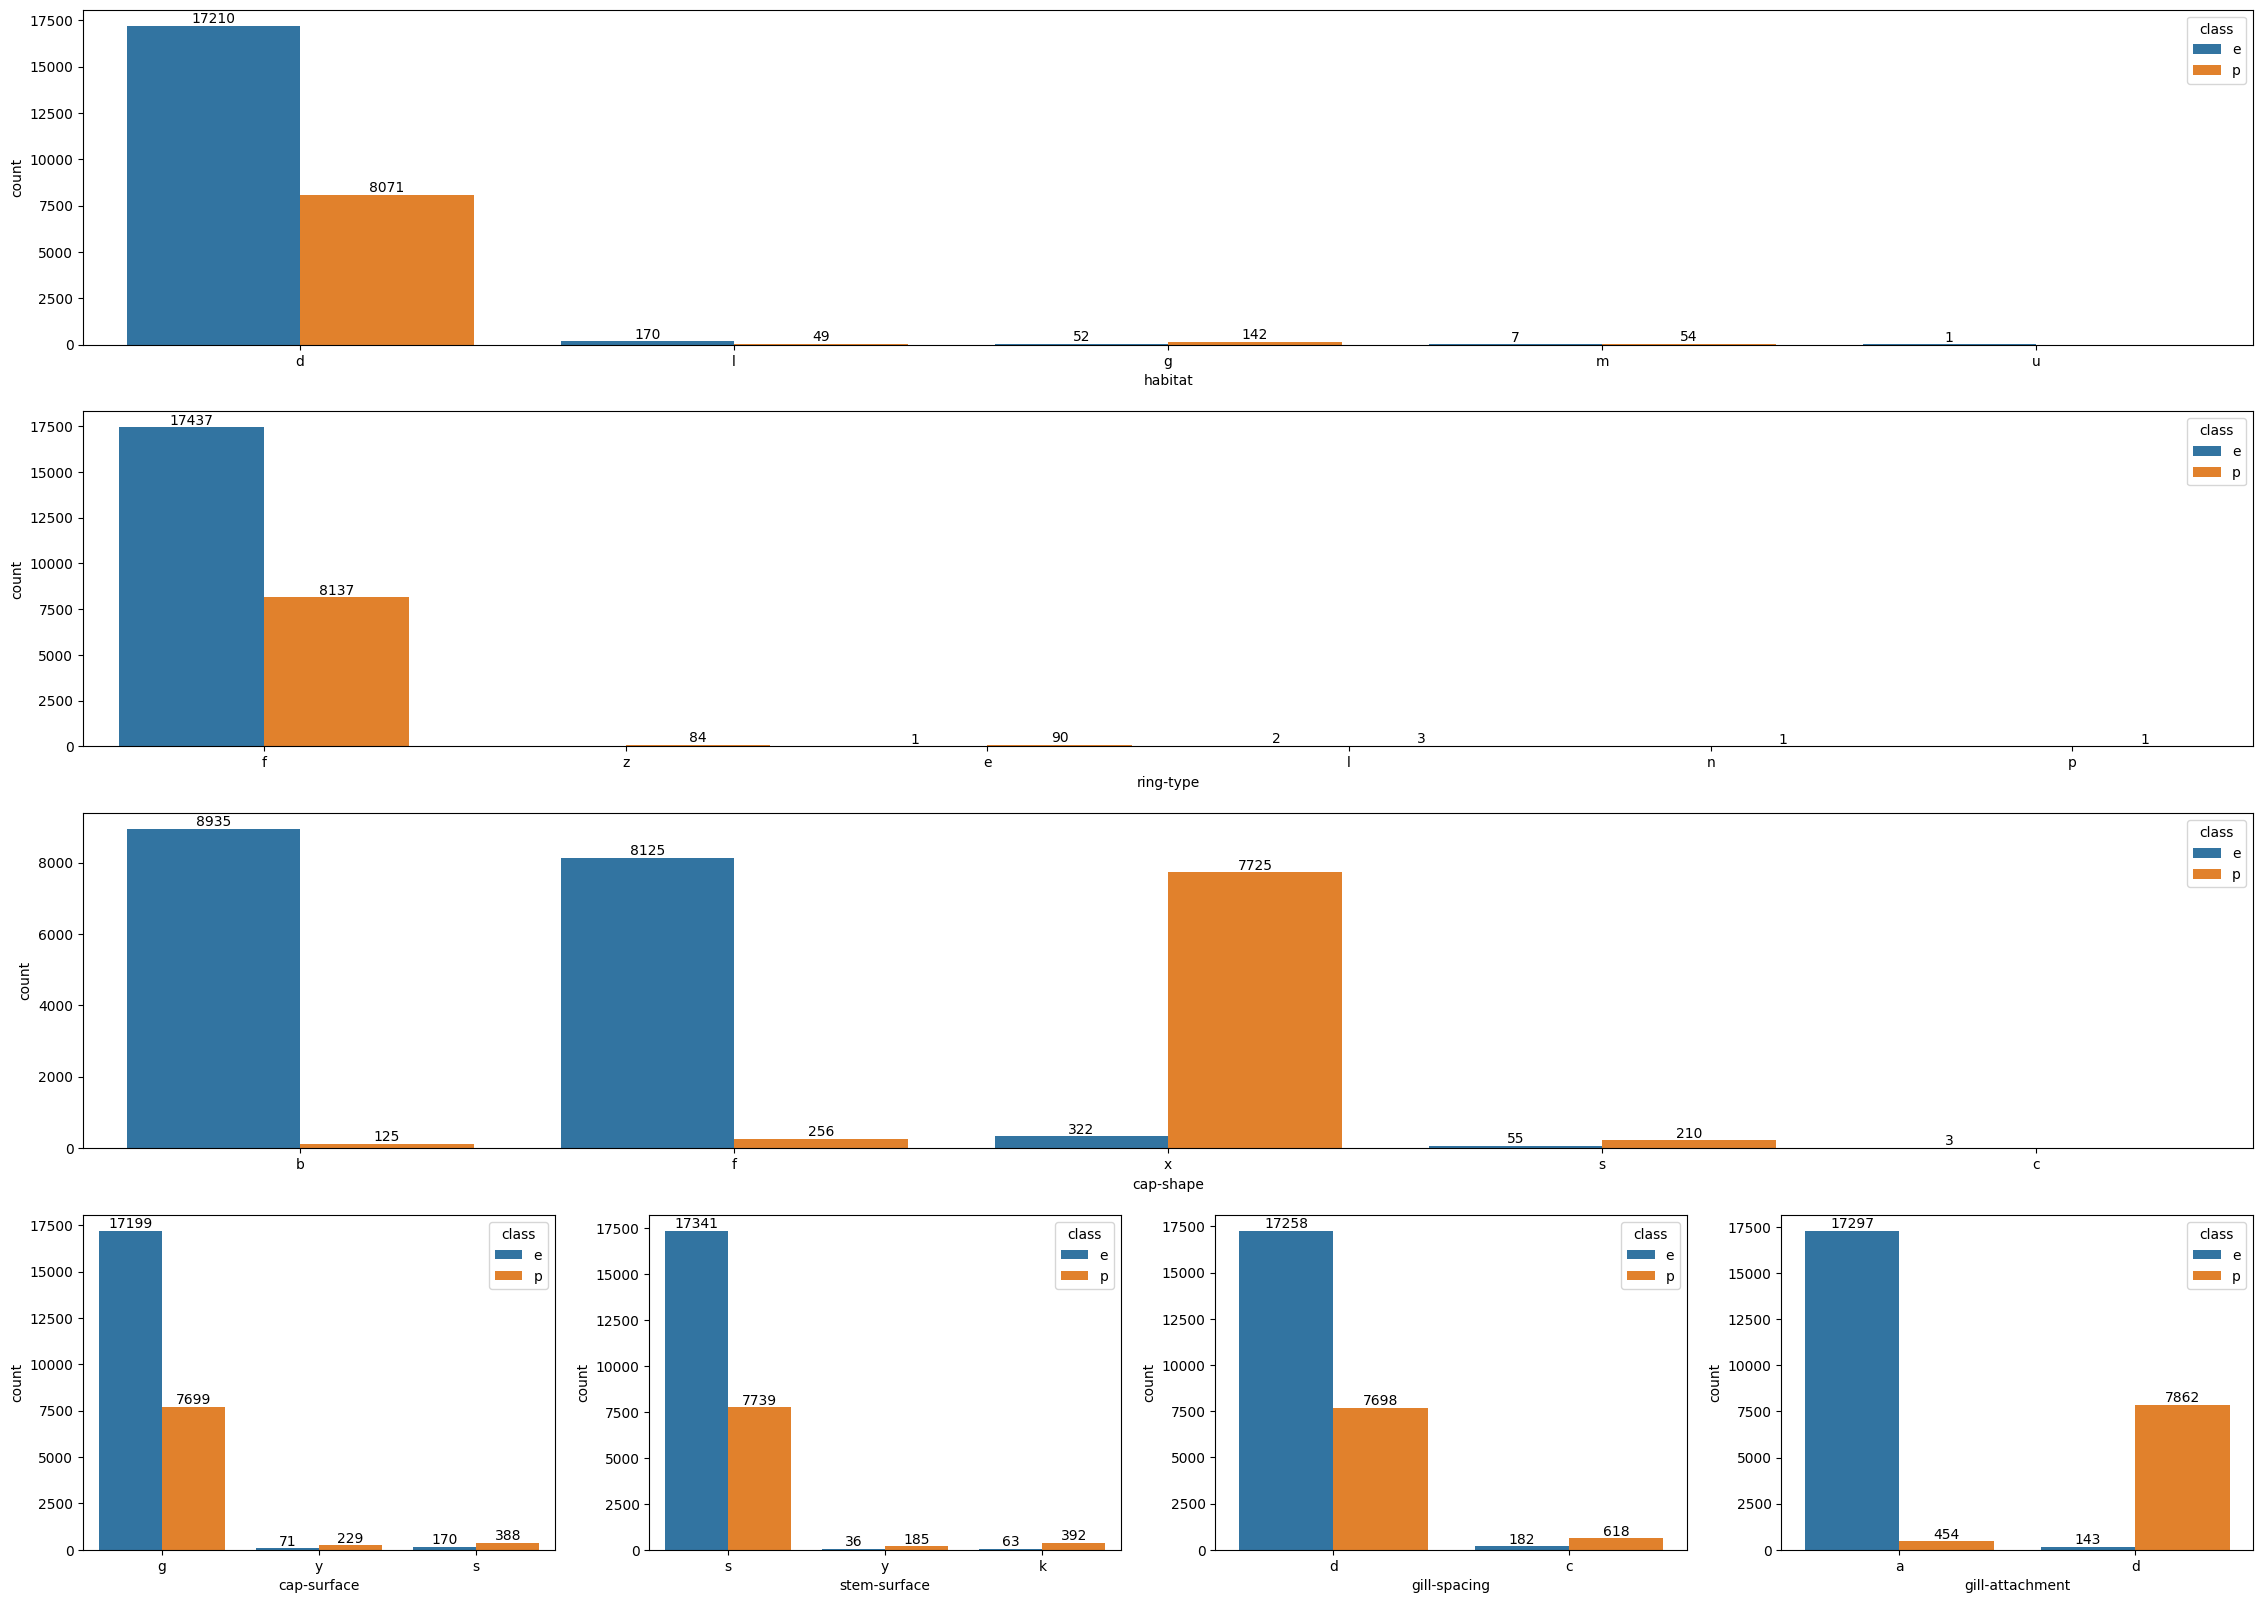

In [37]:
fig = plt.figure(figsize=(28, 20))

ax10 = plt.subplot2grid((4, 4), (0, 0), colspan=4)
sns.countplot(data=train_data2, x='habitat', hue='class', ax=ax10)
for p in ax10.containers:
    ax10.bar_label(p, fmt="%d")

ax11 = plt.subplot2grid((4, 4), (1, 0), colspan=4)
sns.countplot(data=train_data2, x='ring-type', hue='class', ax=ax11)
for p in ax11.containers:
    ax11.bar_label(p, fmt="%d")
    
ax12 = plt.subplot2grid((4, 4), (2, 0), colspan=4)
sns.countplot(data=train_data2, x='cap-shape', hue='class', ax=ax12)
for p in ax12.containers:
    ax12.bar_label(p, fmt="%d")

ax13 = plt.subplot2grid((4, 4), (3, 0))
sns.countplot(data=train_data2, x='cap-surface', hue='class', ax=ax13)
for p in ax13.containers:
    ax13.bar_label(p, fmt="%d")

ax14 = plt.subplot2grid((4, 4), (3, 1))
sns.countplot(data=train_data2, x='stem-surface', hue='class', ax=ax14)
for p in ax14.containers:
    ax14.bar_label(p, fmt="%d")
    
ax15 = plt.subplot2grid((4, 4), (3, 2))
sns.countplot(data=train_data2, x='gill-spacing', hue='class', ax=ax15)
for p in ax15.containers:
    ax15.bar_label(p, fmt="%d")

ax16 = plt.subplot2grid((4, 4), (3, 3))
sns.countplot(data=train_data2, x='gill-attachment', hue='class', ax=ax16)
for p in ax16.containers:
    ax16.bar_label(p, fmt="%d")